## Quasi Monte Carlo 


## European call Option 

Suppose we want to price an option with the initial asset price: $$S_{0}=100$$
strike price: $$K=100$$
risk free rate: $$ r=0.02$$
volatility: $$ \sigma =0.25$$
and maturity: $$T=1$$
year. Risk-neutral pricing process is as follows:
$$ S_{T} = S_{0} \times \exp((r-\sigma^2/2 )T +\sigma Z\sqrt{T})$$
where $Z$ denotes the Brownian Motion which follows the normal distribution with $Z \sim N(0,1)$

## Halton Sequence dimension $(d=1)$ is the Van Der Corput sequence

We generate Halton sequence of prime numbers $n=10^3$ with  that follow the Normal Distribution for mimicing the Brownian Motion in European call Option:



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import chaospy
distribution = chaospy.J(chaospy.Normal(0, 1),chaospy.Normal(0, 1))
samples = distribution.sample(1000,rule="halton")[0]

## Next we test the normality of this sequence

$$H_{O}: p_{1},p_{2},\dots,p_{D} \sim N(0.1)$$
$$H_{1}: p_{1},p_{2},\dots,p_{D} \nsim N(0.1)$$

In [2]:
from scipy import stats
kolmogorov_test = stats.kstest(samples, 'norm',alternative='two-sided')
print(kolmogorov_test)
shapiro_test = stats.shapiro(samples)
print(shapiro_test)

KstestResult(statistic=0.0024531250000000004, pvalue=1.0)
ShapiroResult(statistic=0.9994845986366272, pvalue=0.9973069429397583)


In [3]:
from scipy import stats
p = shapiro_test.pvalue
alpha = 0.05

if p < alpha:  # null hypothesis: x comes from a normal distribution
     print("The null hypothesis can be rejected")
else:
     print("The null hypothesis cannot be rejected")

The null hypothesis cannot be rejected


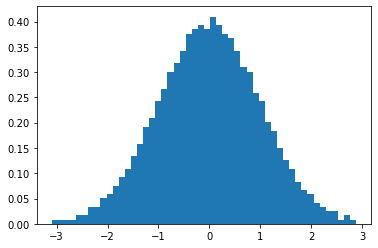

In [4]:
import numpy as np
import pandas as pd
import scipy.stats as st
import sklearn.linear_model as lm
import matplotlib.pyplot as plt
plt.hist(samples,bins=50,density=1)
plt.show()

In [5]:
def Callqsim(S0, K, r, Ti, sigma,M):
    
    
    distribution = chaospy.J(chaospy.Normal(0, 1),chaospy.Normal(0, 1))
    
    samples = np.array(distribution.sample(M,rule="halton"))[0]
    
    
    ri      = (r-0.5*sigma**2)*Ti
    sd      = sigma*np.sqrt(Ti)
    
    price   = S0*np.exp(ri+sd*samples)
    call    = np.maximum(price - K,0)
    
    Pcall   = call*(np.exp(-ri*Ti))
    
    pricem  = np.mean(Pcall)
    rmse    = np.var(Pcall)/M
    rate    = 1/np.sqrt(M)
    
    return(pricem,rmse,rate)


S0 = 100     
K  = 70        
r  = 0.02       
Ti = 1/4       
sigma = 0.02 
M = 1000
Callqsim(S0,K,r,Ti,sigma,M)

(30.458834814256683, 0.0009927051643259732, 0.03162277660168379)

In [6]:
np.random.seed(6969)
qmc_simul = Callqsim(S0,K,r,Ti,sigma,M)
qmc_simul = np.asmatrix(qmc_simul)
qmc_simul

matrix([[3.04588348e+01, 9.92705164e-04, 3.16227766e-02]])

In [7]:
N=100
items = np.arange(2,N,1)
qmc_simul1 = []
for i in items:
    qmc_simul1.append(Callqsim(S0,K,r,Ti,sigma,N*i))
qmc_simul1 = np.asmatrix(qmc_simul1)

In [8]:
qmc = np.concatenate((qmc_simul,qmc_simul1))

## Value plot

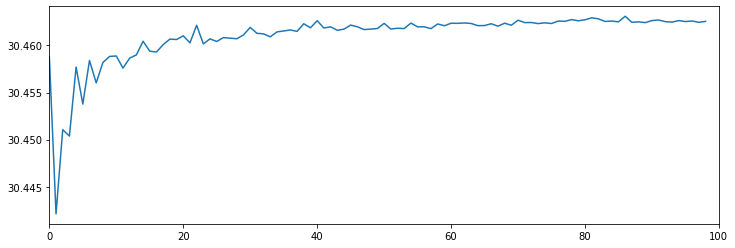

In [9]:
plt.figure(figsize=(12,4))
plt.xlim(0,(N))

plt.plot((qmc[:,0]))

## convergence rate plot 

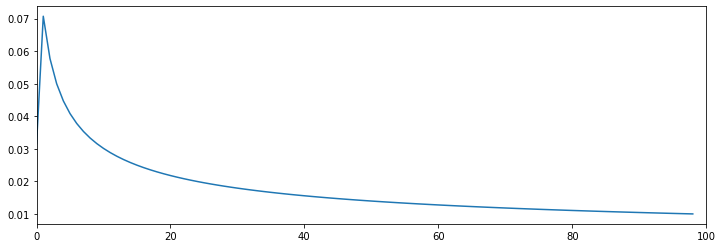

In [10]:
plt.figure(figsize=(12,4))
plt.xlim(0,(N))

plt.plot((qmc[:,2]))

In [11]:
n = 10**4
M = np.arange(100,n+1,1)

$$MC = \frac{1}{\sqrt{M}}$$

$$QMC_{d=1} = \frac{\log(M)^{1}}{M}$$

$$QMC_{d=2} = \frac{\log(M)^{2}}{M}$$

$$QMC_{d=3} = \frac{\log(M)^{3}}{M}$$

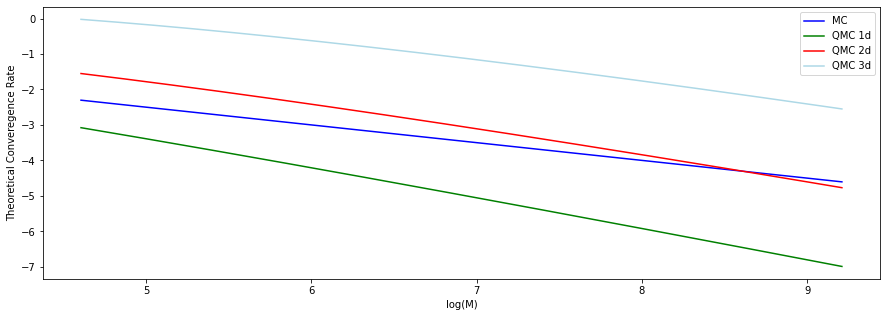

In [12]:
plt.figure(figsize=(15,5))
plt.plot(np.log(M),np.log(1/np.sqrt(M)), color="blue",label="MC")
plt.plot(np.log(M),np.log(np.log(M)**1/M),color="green",label="QMC 1d" )
plt.plot(np.log(M),np.log(np.log(M)**2/M),color="red" ,label="QMC 2d")
plt.plot(np.log(M),np.log(np.log(M)**3/M),color="lightblue",label="QMC 3d")
plt.legend(loc="upper right")
plt.xlabel("log(M)")
plt.ylabel("Theoretical Converegence Rate")
plt.show()